### Aprendizagem Automatica Avancada
#### Trabalho Laboratorial Nº1
#### Dataset CIFAR-10

### Indice
##### 1.Import Libraries
##### 2.Import Data
##### 3.Data exploration
##### 4.Pre-processing
    * 4.1 Passar de matriz para um lista 
    * 4.2 Shuffle training data and sort test data 
    * 4.3 Converter imagens com cores para imagens a cinzento
    * 4.4 Converter imagens em vetores
#### 1.  Na tarefa de classificacao binaria, considere os exemplos da classe ”ship”(embarcacao) como exemplos positivos e as imagens das restantes classes como exemplos negativos.
#### 2. Na tarefa de classificacao binaria treine, teste e compare dois classificadores a sua escolha.
    * 2.1 Treinar e testar os dois classificadores
    * 2.2 Avaliar a performace do classificador
    * 2.3 Model calibration
    * 2.4 Roc curve
    * 2.5 Precision-recal curve
    * 2.6 Matrizes de confucao?
#### 3. Na tarefa de classificacao multi-classe treine e teste um classificador a sua escolha.
    * treinar e testar
    * avalicao da performace do classificador
        * Matrix?
#### 4. Em ambas as tarefas de classificac¸ao verifique se normalizar os dados (dados com media numa e variancia unitaria) e benefico. 
    * 4.1 Normalizacao
    * 4.2 Compararcao de resultados
#### 5. Use os dados de treino para obter uma estimativa do desempenho dos classificadores e verifique se a estimativa condiz com os resultados obtidos com os dados de teste.
    * Split dos dados de treino
    * classificar 
    * verificar o desempenho com dos resultados com os dados de teste
    
#### 6. Na tarefa de classificacao multi-classe, verifique se transformar os dados com PCA e benefico. Estime igualmente o numero adequado de componentes principais
    * Transformar os dados com o PCA
    * verificar se é benefico
    * Qual é o melhor numero de componentes principais?

In [ ]:
#             inicio,                   para gray,        
#(Xtrain, ytrain), (Xtest,ytest), (XtrainGray, XtestGray)

#(X_train, ytrain), (X_test, ytest) multi-class
#(X_train, ytrainb), (X_test, ytestb) - binary

# SVC_model: ytest_predict_LSVC
# rand_model: ytest_predict_rand

#mulkti
#(X_train, ytrain), (X_test, ytest)

In [ ]:
# https://www.kaggle.com/code/mackjay/cifar-cnn/data?select=datasets_preparing.py
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

# Import libraries

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy.random as rnd

# Import Data

In [47]:
cifar10=keras.datasets.cifar10
(Xtrain,ytrain), (Xtest,ytest)=cifar10.load_data()

# Data exploration

In [48]:
print("Shapes")  #imagens devem estar no formato de vetor
print('Training set:\n',Xtrain.shape, ytrain.shape) #shape deve ser (50000, 32*32) e (50000,)
print('Test set:\n', Xtest.shape, ytest.shape) # imagens with colors, convert to grayscale?

Shapes
Training set:
 (50000, 32, 32, 3) (50000, 1)
Test set:
 (10000, 32, 32, 3) (10000, 1)


In [49]:
print("Dtypes") #imagens devem estar no formato float
print('Training set:\n',Xtrain.dtype, ytrain.dtype) 
print('Test set:\n', Xtest.dtype, ytest.dtype) 

Dtypes
Training set:
 uint8 uint8
Test set:
 uint8 int32


In [50]:
# Img =[]
# for i in range(10):
#     idx=np.argwhere(ytrain==i).squeeze()
#     plt.figure()
#     plt.imshow(Xtrain[idx])
#     plt.show()
    
#Img=np.hstack((255-Xtrain[idx[1]], np.ones((28,3))*255))
# plt.figure(figsize=(20,10))
# plt.imshow(ImgT,cmap='gray')
# plt.axis('off')


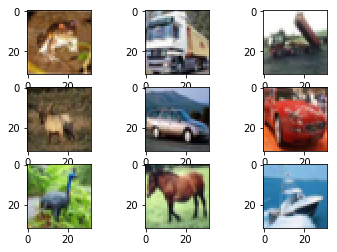

In [51]:
# plot first few images
for i in range(9):
    #print(ytrain[i])
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(Xtrain[i])
# show the figure
plt.show()

# Pre-processing

### 1.Passar de matriz para um lista

In [52]:
print("ytrain:", ytrain, "Dimensoes:", ytrain.shape)
print("ytest:", ytest, " Dimensoes:", ytest.shape)

ytrain: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]] Dimensoes: (50000, 1)
ytest: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]  Dimensoes: (10000, 1)


In [53]:
ytrain = ytrain.squeeze()
ytest = ytest.squeeze()

In [54]:
print("ytrain:", ytrain, "Dimensoes:", ytrain.shape)
print("ytest:", ytest, " Dimensoes:", ytest.shape)

ytrain: [6 9 9 ... 9 1 1] Dimensoes: (50000,)
ytest: [3 8 8 ... 5 1 7]  Dimensoes: (10000,)


### 2. Shuffle training data and sort test data

In [55]:
# Utilizar a funcao permutation() para fazer shuffle nos dados
idx = rnd.permutation(Xtrain.shape[0])
Xtrain = Xtrain[idx]
ytrain = ytrain[idx]

In [56]:
# Ordenar os dados de teste
idx = np.argsort(ytest)
Xtest = Xtest[idx]
ytest = ytest[idx]

### 3.Converter imagens com cores para imagens a cinzento

(50000, 32, 32)


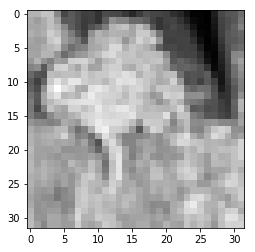

In [57]:
import cv2

def to_gray(data):
    # Matriz temporaria de [50000, 32, 32]
    data_Gray = np.zeros((data.shape[0], data.shape[1], data.shape[2]))  
    
    for i in range(data.shape[0]):
         #Transforma uma imagem a cores em cinzento (gray)
        data_Gray[i] = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY) 
    return data_Gray


XtrainGray = to_gray(Xtrain)
print(XtrainGray.shape)     # Confirmar as dimensoes da matriz ()
plt.imshow(XtrainGray[1], cmap='gray')   #Exemplo de uma imagem em cinzento (gray)
plt.show()

(10000, 32, 32)


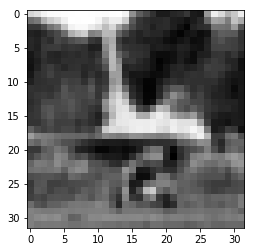

In [58]:
XtestGray = to_gray(Xtest)
print(XtestGray.shape)      # Confirmar pelas dimensoes da matriz , se a imagem esta em cinzento (gra)
plt.imshow(XtestGray[1],cmap='gray')    # Exemplo de uma imagem em cinzento (gray)
plt.show()

### 4. Converter imagens em vetores 
Imagens devem ser convertidas em vetores porque os algoritmos de classificacao utilizam este formato

Reshape() - funcao que modifica as dimensoes dos dados (XtrainGray e XtestGray) <br>
X_train =(50000, 1024) e X_test = (10000, 1024) <br>
Multiplicacao do resultado por 1.0 para transformar valores dos tipo uint8 para valores do tipo float

In [59]:
# (XtrainGray ,ytrain), (XtestGray,ytest)

X_train = XtrainGray.reshape((XtrainGray.shape[0], XtrainGray.shape[1]**2)) * 1.0
X_test = XtestGray.reshape((XtestGray.shape[0], XtestGray.shape[1]**2)) * 1.0

print('Training set:',X_train.shape,X_train.dtype)
print('Test set:    ',X_test.shape,X_test.dtype)

Training set: (50000, 1024) float64
Test set:     (10000, 1024) float64



#### 1.  Na tarefa de classificacao binaria, considere os exemplos da classe ”ship”(embarcacao) como exemplos positivos e as imagens das restantes classes como exemplos negativos.

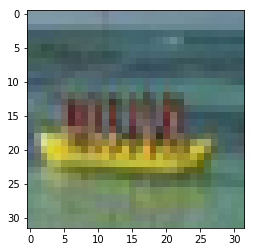

In [60]:
# Como saber se é o 8?
#Exemplo de uma classe Embarcacao
for i, num in enumerate(ytrain):
    if num == 8:
        plt.imshow(Xtrain[i])
        plt.show()
        break

### Index 8

In [61]:
# (X_train ,ytrain), (X_tests,ytest)
# create the target vectors for this problem:
ytrainb=(ytrain==8)*1  
ytestb=(ytest==8)*1

unique, counts = np.unique(ytrainb, return_counts=True)
dict(zip(unique, counts))

{0: 45000, 1: 5000}

#### 2. Na tarefa de classificacao binaria treine, teste e compare dois classificadores a sua escolha.
##### Classificadores : SGDClassifier e RandomForestClassifier  LogisticRegression SVC

#### 2.1 Treinar e testar os dois classificadores

## 2.1.1 Linear Support Vector Classification

In [ ]:
#             inicio,                   para gray,        
#(Xtrain, ytrain), (Xtest,ytest), (XtrainGray, XtestGray) 
#(X_train,          X_test)  gray com reshape

In [63]:
from time import time
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, accuracy_score

In [ ]:
from sklearn.svm import LinearSVC
st=time()
SVC_model=LinearSVC().fit(X_train, ytrain)
ytest_predict_LSVC=SVC_model.predict(X_test)

print("O tempo que o algoritmo demora e:", time()-st)

## Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_model=SGDClassifier().fit(X_train, ytrain)
ytest_predict_SGDC=sgd.predict(X_test)


### 2.2 Avaliar a performace do classificador

In [42]:
def confusio_matrix(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(6,4))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Matrice de confusion')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+ " = "+str(cm[i][j]))
    plt.show()

In [ ]:
# 2. Avaliar a performace do modelo
def evaluate_performance(model):
    print("O score dos algoritmo em percentagem:", 100*SVC_model.score(X_tests, ytestb))
    
    print(classification_report(ytestb, ytest_predict))
    
    print('Numero total de errors:',np.sum(ytestb!=ytest_predict)) 
    print('Matrix de confusao:')
    cm =confusion_matrix(ytestb, ytest_predict)
    print(cm)
    confusio_matrix(ytestb, ytest_predict)

### 2.3 Model calibration

### 1. Treinar e testar o classificador Logistic regression

In [20]:
# (X_train ,ytrainb), (X_tests, ytestb), ytest_predict
from sklearn.linear_model import LogisticRegression
st=time()

#Treinar o classificador com os dados de treino
logR_Model = LogisticRegression(max_iter=3000).fit(X_trains, ytrainb) 
# utlizazar o modelo e prever os resultado com os dados de teste
ytest_predict = logR_Model.predict(X_tests)   

print("O tempo que o algoritmo demora e:", time()-st)

NameError: name 'X_trains' is not defined

### 2. Avaliar a performace do classificador Logistic regression

In [92]:
print("O score dos algoritmo em percentagem:", 100*logR_Model.score(X_tests, ytestb))
#print(accuracy_score(ytestb, ytest_predict))

O score dos algoritmo em percentagem: 89.77000000000001


In [93]:
print(classification_report(ytestb, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9000
           1       0.44      0.08      0.13      1000

    accuracy                           0.90     10000
   macro avg       0.67      0.53      0.54     10000
weighted avg       0.86      0.90      0.86     10000



Numero total de errors: 1023
Matrix de confusao:
[[8899  101]
 [ 922   78]]


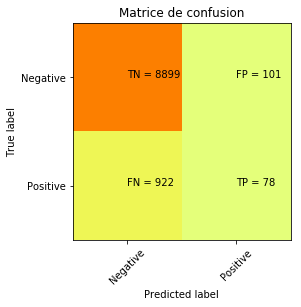

In [94]:
print('Numero total de errors:',np.sum(ytestb!=ytest_predict)) 
print('Matrix de confusao:')
cm =confusion_matrix(ytestb, ytest_predict)
print(cm)
confusio_matrix(ytestb, ytest_predict)

In [95]:
def metrics(ytest, ytest_predict):
    #recall
        #recall= recall_score(ytest, ytest_predict)
    recall=np.sum(ytest_predict[ytest==1]==1)/(np.sum(ytest_predict[ytest==1]==1)+np.sum(ytest_predict[ytest==1]==0))
    #precision
        #precision= precision_score(ytest, ytest_predict)
    precision=np.sum(ytest_predict[ytest==1]==1)/(np.sum(ytest_predict[ytest==1]==1)+np.sum(ytest_predict[ytest==0]==1))
    #fp-rate
    fp_rate=np.sum(ytest_predict[ytest==0]==1)/(np.sum(ytest_predict[ytest==0]==0)+np.sum(ytest_predict[ytest==0]==1))
    print('Recall: %3f \nPrecision: %3f \nFP-rate: %3f'%(recall, precision, fp_rate))
    return recall, precision, fp_rate

In [98]:
r1, p1, f1 = metrics(ytestb, ytest_predict)

Recall: 0.078000 
Precision: 0.435754 
FP-rate: 0.011222


### 3. Model calibration

Total number of erros 1023 (in 10000)


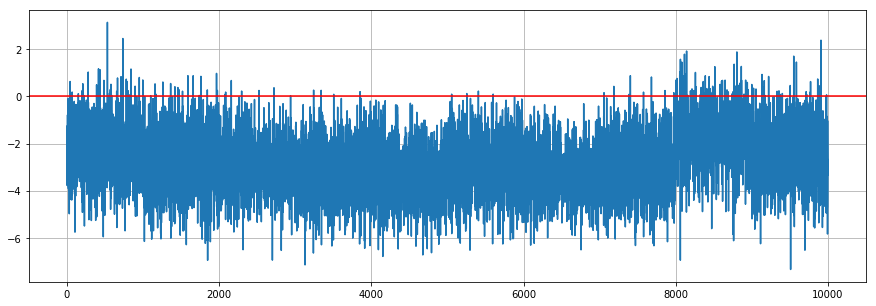

In [99]:
# (X_trains ,ytrainb), (X_tests, ytestb), ytest_predict , ytest_score
ytest_score=logR_Model.decision_function(X_tests) 
plt.figure(figsize=(15,5))
plt.plot(ytest_score)
plt.axhline(y = 0, color = 'r', linestyle = '-') # Thressold é zero por default
plt.grid(True)
print('Total number of erros %d (in %d)'%(np.sum(ytestb!=(ytest_score>=0)*1),ytestb.shape[0]))

#### 3.1 Ajustar o threshold - reduce false negatives?

* Limite = 1

In [100]:
lim1=1
ytestbT1=(ytest_score>lim1)*1
print(confusion_matrix(ytestb, ytestbT1))
print('Total number of erros %d (in %d)'%(np.sum(ytestb!=ytestbT1), ytestb.shape[0]))

# plt.figure(figsize=(15,5))
# plt.plot(ytest_score)
# plt.axhline(y = lim1, color = 'r', linestyle = '-') 
# plt.grid(True)

[[8991    9]
 [ 990   10]]
Total number of erros 999 (in 10000)


In [101]:
r1, p1, f1 = metrics(ytestb, ytestbT1)

Recall: 0.010000 
Precision: 0.526316 
FP-rate: 0.001000


* Limite = 1.2

In [102]:
lim2=1.2
ytestbT2=(ytest_score>lim2)*1
print(confusion_matrix(ytestb, ytestbT2))
print('Total number of erros %d (in %d)'%(np.sum(ytestb!=ytestbT2), ytestb.shape[0]))


# plt.figure(figsize=(15,5))
# plt.plot(ytest_score)
# plt.axhline(y = lim2, color = 'r', linestyle = '-') # Thressold é zero por default
# plt.grid(True)

[[8995    5]
 [ 992    8]]
Total number of erros 997 (in 10000)


In [103]:
r2, p2, f2 = metrics(ytestb, ytestbT2)

Recall: 0.008000 
Precision: 0.615385 
FP-rate: 0.000556


* Limite = 1.4

In [142]:
lim3=1.4
ytestbT3=(ytest_score>lim3)*1
print(confusion_matrix(ytestb, ytestbT3))
print('Total number of erros %d (in %d)'%(np.sum(ytestb!=ytestbT3), ytestb.shape[0]))

# plt.figure(figsize=(15,5))
# plt.plot(ytest_score)
# plt.axhline(y = lim3, color = 'r', linestyle = '-') # Thressold é zero por default
# plt.grid(True)

[[8995    5]
 [ 995    5]]
Total number of erros 1000 (in 10000)


In [143]:
r3, p3, f3 = metrics(ytestb, ytestbT3)

Recall: 0.005000 
Precision: 0.500000 
FP-rate: 0.000556


### 4. Roc curve

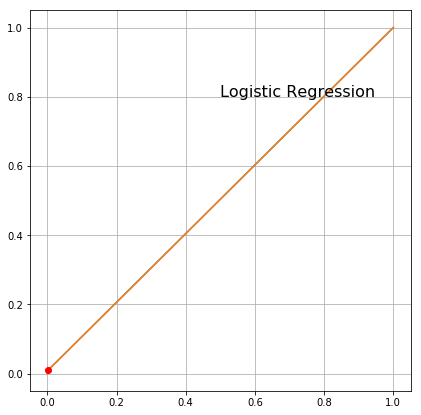

In [105]:
import sklearn.metrics as skm

ytest_score=ytestbT2  # datos com o melhor limite
fp,tp,t=skm.roc_curve(ytestb, ytest_score)
plt.figure(figsize=(7,7))
plt.plot(fp,tp)
plt.text(.5,.8,'Logistic Regression',fontsize=16)
plt.plot(fp,tp)      #linha
plt.plot(f1,r1,'or') #ponto
#plt.plot(f2,r2,'ob') #ponto com menor erros
#plt.plot(f3,r3,'or') #ponto

plt.axis('scaled')
plt.grid(True)

### 5. Precision-recal curve

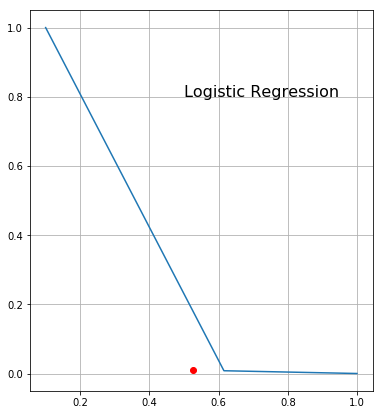

In [107]:
pre,rec,lim=skm.precision_recall_curve(ytestb, ytest_score)
plt.figure(figsize=(7,7))

plt.plot(pre,rec)
plt.text(.5,.8,'Logistic Regression',fontsize=16)
plt.plot(p1,r1,'or')

#plt.plot(p2,r2,'ob') #ponto com menor erros
#plt.plot(p3,r3,'or') #ponto

plt.axis('scaled')
plt.grid(True)

In [57]:
area2=skm.average_precision_score(ytestb, ytest_score)
print(area2)

0.279765452935843


## RandomForestClassifier

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
# (X_trains ,ytrainb), (X_tests, ytestb)
st=time()

ranFor_model = RandomForestClassifier().fit(X_trains, ytrainb)
ytest_predicted = ranFor_model.predict(X_tests)

print("O tempo que o algoritmo demora e:", time()-st)

O tempo que o algoritmo demora e: 126.50006127357483


In [149]:
print('Score:', ranFor_model.score(X_tests, ytestb)*100)

Score: 91.3


Numero total de errors 870
Matrix de confusao:
[[8946   54]
 [ 816  184]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      9000
           1       0.77      0.18      0.30      1000

    accuracy                           0.91     10000
   macro avg       0.84      0.59      0.63     10000
weighted avg       0.90      0.91      0.89     10000



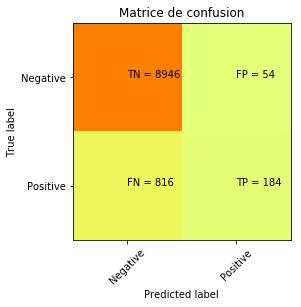

In [150]:
# numero de erros
print('Numero total de errors',np.sum(ytestb!=ytest_predicted)) 
print('Matrix de confusao:')
cm =confusion_matrix(ytestb, ytest_predicted)
print(cm)
print(classification_report(ytestb, ytest_predicted))
confusio_matrix(ytestb, ytest_predicted)

In [146]:
limf=1.2
ytestbTf=(ytest_score>limf)*1
print(confusion_matrix(ytestb, ytestbTf))
print('Total number of erros %d (in %d)'%(np.sum(ytestb!=ytestbTf), ytestb.shape[0]))


[[8995    5]
 [ 992    8]]
Total number of erros 997 (in 10000)


In [152]:
rf, pf, ff = metrics(ytestb, ytest_predicted)

Recall: 0.184000 
Precision: 0.773109 
FP-rate: 0.006000


#### 3.1 Ajustar o threshold - reduce false negatives?

### 4. Roc curve

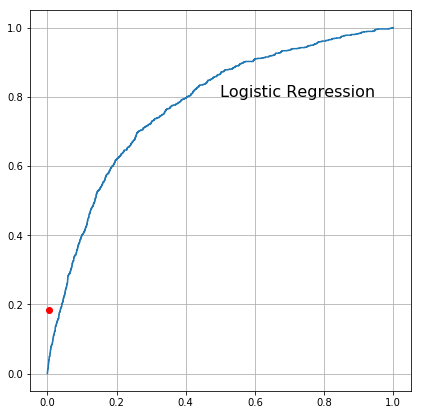

In [153]:
import sklearn.metrics as skm
ffp,ftp,ft=skm.roc_curve(ytestb, ytest_score)
plt.figure(figsize=(7,7))

plt.text(.5,.8,'Random Forest Classifier',fontsize=16)
plt.plot(ffp,ftp)      #linha
plt.plot(ff,rf,'or') #ponto


plt.axis('scaled')
plt.grid(True)

### 5. Precision-recall curve

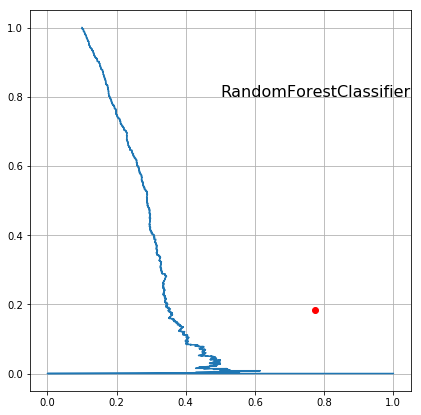

In [155]:
pref,recf,limf=skm.precision_recall_curve(ytestb, ytest_score)
plt.figure(figsize=(7,7))

plt.plot(pref,recf)
plt.text(.5,.8,'Random Forest Classifier',fontsize=16)
plt.plot(pf,rf,'or')

plt.axis('scaled')
plt.grid(True)

### 6. Comparacao entre modelos

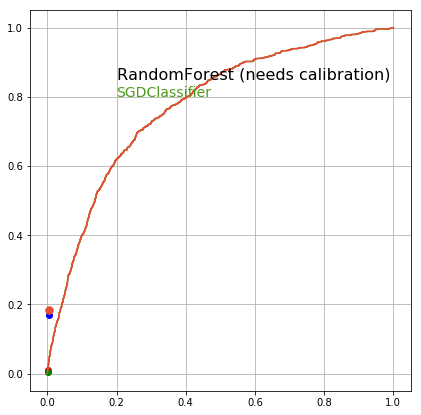

In [157]:
fp,tp,t=skm.roc_curve(ytestb, ytest_score)

plt.figure(figsize=(7,7))
plt.plot(fp,tp,color=[.3,.6,.1])
plt.text(.2,.8,'SGDClassifier',fontsize=14,color=[.3,.6,.1])

plt.plot(f1,r1,'or')
plt.plot(f2,r2,'ob')
plt.plot(f3,r3,'og')


ffp,ftp,ft=skm.roc_curve(ytestb, ytest_score)
plt.plot(ffp,ftp,color=[0.9,0.3,0.2])
plt.text(.2,.85,'RandomForest (needs calibration)',fontsize=16)

plt.plot(ff,rf,'.',ms=15,color=[0.9,0.3,0.2])
plt.axis('scaled')
plt.grid(True)

#### 3. Na tarefa de classificacao multi-classe treine e teste um classificador a sua escolha.
* (X_trains ,ytrain), (X_tests,ytest)

In [ ]:
# (X_trains ,ytrain), (X_tests,ytest)
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

SVC_model=LinearSVC() # Novo Modelo

# metalogia de teste- 
cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

#Model evaluation
score=cross_val_score(SVC_model, X_trains, ytrain, cv=cv)
y1p=cross_val_predict(SVC_model, X_trains, ytrain, cv=cv)


In [ ]:
print(score)
print(np.round(1e4*score)/100)
print(y1p)

In [ ]:
#Treinar e testar o modelo
SVC_model=LinearSVC().fit(XtrainS,ytrain)
y1p=SVC_model.predict(XtrainS)
y2p=SVC_model.predict(XtestS)


# Rodrigo


#### 4. Em ambas as tarefas de classificac¸ao verifique se normalizar os dados (dados com media numa e variancia unitaria) e benefico. 

In [ ]:
# Normalization

from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(XtrainG)
XtrainGS = ss.transform(XtrainG)
XtestGS = ss.transform(XtestG)
'''
m=np.sort(np.mean(Xtrain,axis=0)) # sorted data mean
print(m[:5],m[-5:]) # lowest and highest means
# [0. 0.01 0.01 0.02 0.02] [159.2 159.5 160.7 161.4 161.9]

v=np.sort(np.std(Xtrain,axis=0)) # sorted standard deviation
print(v[:5],v[-5:]) # lowest and highest values
#[0.09 0.25 0.57 0.77 0.93] [101.6 102.3 102.8 103.6 103.7]

import sklearn.preprocessing as pp
sc=pp.StandardScaler().fit(Xtrain)
XtrainS=sc.transform(Xtrain)


'''

In [ ]:
m=np.sort(np.mean(Xtrain,axis=0)) # sorted data mean
print(m[:5],m[-5:]) # lowest and highest means
# [0. 0.01 0.01 0.02 0.02] [159.2 159.5 160.7 161.4 161.9]

v=np.sort(np.std(Xtrain,axis=0)) # sorted standard deviation
print(v[:5],v[-5:]) # lowest and highest values
#[0.09 0.25 0.57 0.77 0.93] [101.6 102.3 102.8 103.6 103.7]

import sklearn.preprocessing as pp
sc=pp.StandardScaler().fit(Xtrain)
XtrainS=sc.transform(Xtrain)

#### 5. Use os dados de treino para obter uma estimativa do desempenho dos classificadores e verifique se a estimativa condiz com os resultados obtidos com os dados de teste.

In [43]:
#60000 e 1000

#### 6. Na tarefa de classificac¸ao multi-classe, verifique se transformar os dados com PCA e benefico. Estime igualmente o numero adequado de componentes principais

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9,whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)
print('Nº of Principal Components kept: %d'%X1p.shape[1])

In [ ]:

from sklearn.svm import LinearSVC
def svc_train_test(X_train, ytrainb):
    st=time()
    SVC_model=LinearSVC().fit(X_train, ytrainb)
    ytest_predict_LSVC=SVC_model.predict(X_test)

    print("O tempo que o algoritmo demora e:", time()-st)



from sklearn.linear_model import SGDClassifier
def SGD_train_test(X_train, ytrainb):

    st=time()
    sgd_model=SGDClassifier().fit(X_train, ytrainb)
    ytest_predict_SGDC=sgd_model.predict(X_test)

    print("O tempo que o algoritmo demora e:", time()-st)


## Stochastic Gradient Descent
evaluate_performance(SVC_model, X_test, ytestb, ytest_predict_LSVC)


##Linear Support Vector Classification
evaluate_performance(sgd_model, X_test, ytestb, ytest_predict_SGDC)


def evaluate_decision(model, X_test):
    # Thressold é zero - Evaluate the decision function for the samples in X.
    sgd_decision=sgd_model.decision_function(X_test) 
    plt.figure(figsize=(15,5))
    plt.plot(sgd_decision)
    plt.axhline(y = 0, color = 'r', linestyle = '-') # Thressold é zero por default
    plt.grid(True)
    return sgd_decision


SVC_desicion=SVC_model.decision_function(X_test) # Thressold é zero
lim=-1
SVCdesicion=(SVC_desicion>lim)*1 
plt.figure(figsize=(15,5))
plt.plot(SVC_desicion)
plt.axhline(y = lim, color = 'r', linestyle = '-') 
plt.grid(True)


## Stochastic Gradient Descent
r1, p1, f1 = metrics(ytestb, ytest_predict_LSVC)

##Linear Support Vector Classification
r2, p2, f2 = metrics(ytestb, ytest_predict_SGDC)


import sklearn.metrics as skm

def show_roc_curve(ytestb, sgd_decision):
    plt.figure(figsize=(7,7))

    fp, tp, t=skm.roc_curve(ytestb, sgd_decision) 
    plt.plot(fp, tp, color=[.3,.6,.1])
    plt.text(.3,.10,'Stochastic Gradient Descent: AUC = %0.2f' % skm.auc(fp, tp) ,fontsize=12,color=[.3,.6,.1])

    ## Stochastic Gradient Descent
    #r1, p1, f1 = metrics(ytestb, ytest_predict_LSVC)
    plt.plot(f1,r1,'or')


fp2, tp2, t2=skm.roc_curve(ytestb, SVC_desicion)
plt.plot(fp2, tp2, color=[0.9,0.3,0.2])
plt.text(.3,.05,'Linear Support Vector: AUC = %0.2f' % skm.auc(fp2, tp2), fontsize=12, color=[0.9,0.3,0.2])

plt.plot(f2,r2,'.',ms=15,color=[0.9,0.3,0.2])

plt.xlabel("False Positive Rate")  #fp / (fp + tn)
plt.ylabel("True Positive Rate")   #Recall
#plt.axis('scaled')
plt.grid(True)
plt.show()

#Note: this implementation is restricted to the binary classification task.
#Compute Receiver operating characteristic (ROC).

#Compute Area Under the Curve (AUC)


def show_precision_recall_curve(ytestb, sgd_decision):
    plt.figure(figsize=(7,7))

    pre,rec,lim=skm.precision_recall_curve(ytestb, sgd_decision)
    plt.plot(pre,rec,color=[.3,.6,.1])
    plt.text(.3,.10,'Stochastic Gradient Descent' ,fontsize=12,color=[.3,.6,.1])

    #plt.plot(p1,r1,'or')

pre1 ,rec1 ,lim1 =skm.precision_recall_curve(ytestb, SVC_desicion)
plt.plot(pre1, rec1, color=[0.9,0.3,0.2])
plt.text(.3,.05,'Linear Support Vector', fontsize=12, color=[0.9,0.3,0.2])


plt.axis('scaled')
plt.grid(True)


##############################
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier().fit(X_train, ytrain)
yrand_predict = rand.predict(X_test)


print('Score:', rand.score(X_test, ytest))
print("Number of errors:", np.sum(ytest != yrand_predict))
plt.figure(figsize=(15, 5))
plt.plot(yrand_predict, ytest, ".", alpha=0.5)
#plt.plot(ytest)
plt.show()

cm = confusion_matrix(ytest, yrand_predict)
print(cm)



In [ ]:
def metrics(ytest, ytest_predict):
    #recall
    #recall=np.sum(ytest_predict[ytest==1]==1)/(np.sum(ytest_predict[ytest==1]==1)+np.sum(ytest_predict[ytest==1]==0))
    recall= recall_score(ytest, ytest_predict)
    precision= precision_score(ytest, ytest_predict)
    #precision
    #precision=np.sum(ytest_predict[ytest==1]==1)/(np.sum(ytest_predict[ytest==1]==1)+np.sum(ytest_predict[ytest==0]==1))
    
    #fp-rate
    fp_rate=np.sum(ytest_predict[ytest==0]==1)/(np.sum(ytest_predict[ytest==0]==0)+np.sum(ytest_predict[ytest==0]==1))
    print('Recall: %3f \nPrecision: %3f \nFP-rate: %3f'%(recall, precision, fp_rate))
    return recall, precision, fp_rate

#def evaluate_decision(model, X_test, lim):

# Calibracao do modelo

In [ ]:
def evaluate_decision_SVC(model, X_test, lim=0):  # Thressold é zero - Evaluate the decision function for the samples in X.
   
    model_e=model.decision_function(X_test)
    y2eC=(model_e>lim)*1
    plt.figure(figsize=(15,5))
    plt.plot(model_e)
    plt.axhline(y = lim, color = 'r', linestyle = '-')
    plt.grid(True)
    return y2eC, model_e



In [ ]:
y_test_SVC, SVC_decision = evaluate_decision_SVC(SVC_model, X_test, lim=0)
#r1, p1, f1 = metrics(ytestb, y_test_SVC)
CM1 = evaluate_performance(SVC_model, X_test, ytestb, y_test_SVC)

In [ ]:
def evaluate_decision_rand(model, X_test, lim=0.25):
   
    model_RF=model.predict_proba(X_test)[:,1]
    ytest=(model_RF>lim)*1                              
   
    plt.figure(figsize=(15,5))
    plt.plot(model_RF)
    plt.axhline(y = lim, color = 'r', linestyle = '-')
    plt.grid(True)
    return ytest, model_RF

## Random Florest
#y_test_RF, rand_decision = evaluate_decision_rand(rand_model, X_test, lim=0.2)
#evaluate_performance(rand_model, X_test, ytestb, y_test_RF)

In [ ]:

#https://www.youtube.com/watch?v=u8th43VOyCw